![InStat Hockey Image](https://pbs.twimg.com/profile_images/872490522027470848/ZY1WyAjl_400x400.jpg)
![Whoop Photo](https://honehealth.com/wp-content/uploads/2023/11/whoop-reviews.webp)
<td><h1 align="center"><font color=orange>Whoop x Instat </font></h1></td> 


The following analysis looks to observe and identify possible trends between the wearable fitness / heart rate monitor, Whoop, and the hockey player performance tracking software, Instat.


[Whoop description](https://en.wikipedia.org/wiki/WHOOP_(company)#:~:text=WHOOP%20is%20an%20American%20wearable,and%20even%20detection%20of%20illness.)

[InStat description](https://www.hockeytech.com/hockeytech-and-instat-sport-make-it-easier-for-hockey-organizations-to-scout-players/#:~:text=InStat%20Sport%2C%20founded,visit%20HockeyTech.com.)

[Why HRV](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5624990/#:~:text=An%20optimal%20level,Go%20to%3A)





**Analysis Highlights:**
- Time Series Analysis of the InStat Index, HRV, and Whoop Recovery Score.
- Statistical Analysis of Recovery Score and InStat index.
- Statistical Analysis of HRV and InStat index.

In [27]:
import pandas as pd

# Load each of the files to see their structure
file_paths = {
    "games": "Games_Henry_McKinney_March_26_2024.xls",
    "physiological_cycles": "physiological_cycles.csv",
    "sleeps": "sleeps.csv",
    "workouts": "workouts.csv"
}

# Reading the files
data = {}
for key, path in file_paths.items():
    if path.endswith('.xls') or path.endswith('.xlsx'):
        data[key] = pd.read_excel(path)
    else:
        data[key] = pd.read_csv(path)

# Displaying the first few rows of each dataframe to understand their structure
for key, df in data.items():
    print(f"First few rows of {key} dataset:")
    display(df.head())
    print("\n")

    
    # Filter based on certain dates, adjust the start_date and end_date as needed
start_date = '2023-09-01'
end_date = '2024-03-25'

# Filtering the physiological_cycles dataset
physio_filtered = data['physiological_cycles'][
    (pd.to_datetime(data['physiological_cycles']['Cycle start time']) >= start_date) &
    (pd.to_datetime(data['physiological_cycles']['Cycle start time']) <= end_date)
]

# Filtering the games dataset
games_filtered = data['games'][
    (pd.to_datetime(data['games']['Date']) >= start_date) &
    (pd.to_datetime(data['games']['Date']) <= end_date)
]


First few rows of games dataset:


,Date,Opponent,Score,InStat Index,All shifts,Time on ice,Goals,First assist,Second assist,Assists,...,Faceoffs,Faceoffs won,"Faceoffs won, %",Hits,Shots,Shots on goal,Blocked shots,Power play shots,Short-handed shots,Passes to the slot
0,2024-03-02,vs Meudon,3 : 2,160,22.0,17:30,-,-,-,-,...,16,7,43.8%,1,6,4,1,3,-,-
1,2023-12-02,vs Cholet,4 : 3,165,25.0,19:59,-,-,-,-,...,16,9,56.3%,1,5,3,1,-,-,1
2,2024-02-03,@ Cholet,4 : 1,191,16.0,15:14,-,2,-,2,...,9,5,55.6%,1,4,2,1,-,-,1
3,2023-11-04,vs Morzine-Avoriaz,2 : 3,175,18.0,18:08,1,-,-,-,...,3,1,33.3%,2,4,2,1,1,-,-
4,2024-01-06,vs Strasbourg,6 : 1,195,20.0,17:43,1,1,1,2,...,7,4,57.1%,-,3,2,-,1,-,-




First few rows of physiological_cycles dataset:


,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),...,Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Sleep consistency %
0,2024-03-26 00:20:14,NaN,UTC+01:00,79.0,41.0,139.0,34.50,95.06,NaN,NaN,...,475.0,534.0,265.0,107.0,103.0,59.0,613.0,127.0,90.0,49.0
1,2024-03-25 02:02:32,2024-03-26 00:20:14,UTC+01:00,65.0,42.0,135.0,34.87,96.79,12.4,2118.0,...,330.0,355.0,155.0,108.0,67.0,25.0,614.0,112.0,93.0,55.0
2,2024-03-24 02:44:09,2024-03-25 02:02:32,UTC+01:00,80.0,42.0,137.0,35.27,96.10,15.2,3100.0,...,421.0,467.0,272.0,60.0,89.0,46.0,595.0,127.0,90.0,43.0
3,2024-03-23 06:40:11,2024-03-24 02:44:09,UTC+01:00,10.0,57.0,46.0,35.40,94.90,5.3,972.0,...,273.0,299.0,196.0,57.0,20.0,26.0,606.0,84.0,91.0,22.0
4,2024-03-22 03:46:38,2024-03-23 06:40:11,UTC+01:00,35.0,49.0,78.0,35.04,96.71,17.9,4092.0,...,319.0,341.0,198.0,65.0,56.0,22.0,488.0,51.0,93.0,40.0




First few rows of sleeps dataset:


,Cycle start time,Cycle end time,Cycle timezone,Sleep onset,Wake onset,Sleep performance %,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Sleep consistency %,Nap
0,2024-03-26 00:20:14,NaN,UTC+01:00,2024-03-26 00:20:14,2024-03-26 09:14:44,78.0,13.4,475.0,534.0,265.0,107.0,103.0,59.0,613.0,127.0,90.0,49.0,False
1,2024-03-25 02:02:32,2024-03-26 00:20:14,UTC+01:00,2024-03-25 02:02:32,2024-03-25 07:57:55,54.0,13.6,330.0,355.0,155.0,108.0,67.0,25.0,614.0,112.0,93.0,55.0,False
2,2024-03-24 02:44:09,2024-03-25 02:02:32,UTC+01:00,2024-03-24 02:44:09,2024-03-24 10:31:21,71.0,13.7,421.0,467.0,272.0,60.0,89.0,46.0,595.0,127.0,90.0,43.0,False
3,2024-03-23 06:40:11,2024-03-24 02:44:09,UTC+01:00,2024-03-23 06:40:11,2024-03-23 11:44:56,45.0,15.6,273.0,299.0,196.0,57.0,20.0,26.0,606.0,84.0,91.0,22.0,False
4,2024-03-22 03:46:38,2024-03-23 06:40:11,UTC+01:00,2024-03-22 03:46:38,2024-03-22 09:27:54,65.0,14.8,319.0,341.0,198.0,65.0,56.0,22.0,488.0,51.0,93.0,40.0,False




First few rows of workouts dataset:


,Cycle start time,Cycle end time,Cycle timezone,Workout start time,Workout end time,Duration (min),Activity name,Activity Strain,Energy burned (cal),Max HR (bpm),Average HR (bpm),HR Zone 1 %,HR Zone 2 %,HR Zone 3 %,HR Zone 4 %,HR Zone 5 %,GPS enabled,Distance (meters),Altitude gain (meters),Altitude change (meters)
0,2024-03-26 00:20:14,NaN,UTC+01:00,2024-03-26 11:34:30,2024-03-26 12:37:29,62,Ice Hockey,11.2,562.0,158.0,129.0,16.0,44.0,34.0,0.0,0.0,False,NaN,NaN,NaN
1,2024-03-25 02:02:32,2024-03-26 00:20:14,UTC+01:00,2024-03-25 15:48:00,2024-03-25 16:37:29,49,Ice Hockey,10.9,504.0,163.0,136.0,8.0,44.0,48.0,0.0,0.0,False,NaN,NaN,NaN
2,2024-03-22 03:46:38,2024-03-23 06:40:11,UTC+01:00,2024-03-23 05:52:30,2024-03-23 06:26:59,34,Activity,11.6,430.0,183.0,148.0,7.0,9.0,62.0,22.0,0.0,False,NaN,NaN,NaN
3,2024-03-21 02:07:06,2024-03-22 03:46:38,UTC+01:00,2024-03-21 20:12:00,2024-03-21 22:31:29,139,Ice Hockey,14.0,1124.0,174.0,125.0,29.0,40.0,24.0,2.0,0.0,False,NaN,NaN,NaN
4,2024-03-21 02:07:06,2024-03-22 03:46:38,UTC+01:00,2024-03-21 19:19:30,2024-03-21 19:59:59,40,Ice Hockey,8.5,301.0,166.0,120.0,10.0,38.0,23.0,3.0,0.0,False,NaN,NaN,NaN


# Visualize Recovery Score, HRV and InStat Index trends 

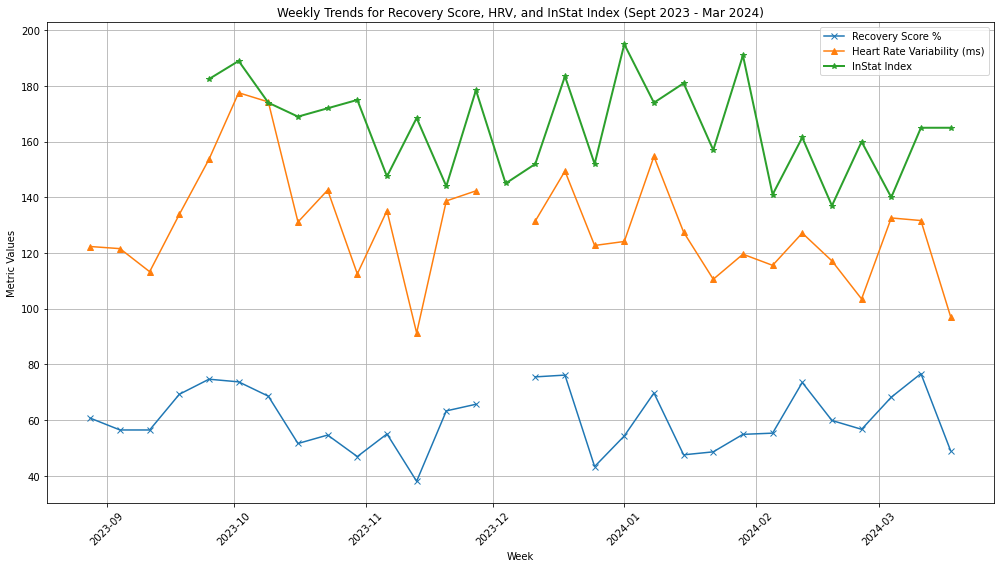

In [28]:
plt.figure(figsize=(14, 8))

# Plot only the Recovery score % and Heart Rate Variability (ms), and InStat Index
plt.plot(weekly_trends['Week'], weekly_trends['Recovery score %'], label='Recovery Score %', marker='x')
plt.plot(weekly_trends['Week'], weekly_trends['Heart rate variability (ms)'], label='Heart Rate Variability (ms)', marker='^')
plt.plot(weekly_trends['Week'], weekly_trends['InStat Index'], label='InStat Index', marker='*', linewidth=2)

# Set the title and labels
plt.title('Weekly Trends for Recovery Score, HRV, and InStat Index (Sept 2023 - Mar 2024)')
plt.xlabel('Week')
plt.ylabel('Metric Values')

# Enhance the legibility of the chart
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# If you're using a notebook, this will ensure the plot displays
plt.show()


In [29]:
from scipy.stats import linregress

# We'll define a function to perform linear regression and return the slope, intercept, and p-value
def perform_regression(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, intercept, p_value

# Since our Week column is in datetime format, we need a numerical value for regression analysis
# We'll convert dates to ordinal numbers which are suitable for regression models
weekly_trends['Week_ordinal'] = weekly_trends['Week'].map(pd.Timestamp.toordinal)

# Initialize an empty dictionary to hold regression results
regression_results = {}

# Perform regression for each metric and store the results
for metric in ['Recovery score %', 'Heart rate variability (ms)', 'InStat Index']:
    if metric in weekly_trends.columns:
        # Handle missing values by dropping them
        regression_data = weekly_trends.dropna(subset=['Week_ordinal', metric])
        slope, intercept, p_value = perform_regression(regression_data['Week_ordinal'], regression_data[metric])
        regression_results[metric] = {'slope': slope, 'intercept': intercept, 'p_value': p_value}

regression_results

{'Recovery score %': {'slope': -0.005004441549521448,
  'intercept': 3757.7185706091536,
  'p_value': 0.8819179458032032},
 'Heart rate variability (ms)': {'slope': -0.1103380222735097,
  'intercept': 81654.02466513014,
  'p_value': 0.06552060825658373},
 'InStat Index': {'slope': -0.10412698412698415,
  'intercept': 77102.26207570209,
  'p_value': 0.09994772192901408}}

In [30]:
from scipy import stats
import numpy as np

# Let's create a function that will perform linear regression and return the slope, intercept, p-value, and standard error
def linear_regression_analysis(df, y_column):
    df = df.copy()
    # Remove rows where the y_column is NaN
    df = df.dropna(subset=[y_column])
    # Use ordinal values of weeks for the linear regression
    df['Time'] = np.arange(len(df))
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['Time'], df[y_column])
    return slope, intercept, r_value**2, p_value, std_err

# Perform linear regression for Recovery Score %, Heart Rate Variability (ms), and InStat Index
stat_results = {}
for column in ['Recovery score %', 'Heart rate variability (ms)', 'InStat Index']:
    if column in weekly_trends:
        stat_results[column] = linear_regression_analysis(weekly_trends, column)

stat_results


{'Recovery score %': (-0.04226659629368987,
  60.72050903119868,
  0.0010942237487004227,
  0.8647374466170532,
  0.2457675769401666),
 'Heart rate variability (ms)': (-0.8168736805066852,
  140.9309359605911,
  0.1213515600569826,
  0.06403674078168034,
  0.4230170872728229),
 'InStat Index': (-0.7288888888888888,
  174.4957264957265,
  0.1087368031371648,
  0.0999477219290142,
  0.4259615665085307)}

In [31]:
from scipy.stats import linregress

# Assume 'weekly_trends' DataFrame is already defined and includes the 'Week' as datetime

# Convert 'Week' to a numerical format for regression
weekly_trends['Week_ordinal'] = weekly_trends['Week'].apply(lambda x: x.toordinal())

# Perform linear regression and extract p-values
for column in ['Recovery score %', 'Heart rate variability (ms)', 'InStat Index']:
    # Drop NA values for the regression analysis
    clean_data = weekly_trends.dropna(subset=[column])
    slope, intercept, r_value, p_value, std_err = linregress(clean_data['Week_ordinal'], clean_data[column])
    print(f"Linear regression for {column}:")
    print(f"  Slope: {slope}")
    print(f"  Intercept: {intercept}")
    print(f"  R-squared: {r_value**2}")
    print(f"  P-value: {p_value}")
    print(f"  Standard error: {std_err}\n")


Linear regression for Recovery score %:
  Slope: -0.005004441549521448
  Intercept: 3757.7185706091536
  R-squared: 0.0008320943870084856
  P-value: 0.8819179458032032
  Standard error: 0.033373878510179554

Linear regression for Heart rate variability (ms):
  Slope: -0.1103380222735097
  Intercept: 81654.02466513014
  R-squared: 0.12009798276994817
  P-value: 0.06552060825658373
  Standard error: 0.05747680430445455

Linear regression for InStat Index:
  Slope: -0.10412698412698415
  Intercept: 77102.26207570209
  R-squared: 0.10873680313716487
  P-value: 0.09994772192901408
  Standard error: 0.060851652358361534



HRV vs InStat Index: {'correlation': 0.32045318345843316, 'p_value_corr': 0.11834725559411366, 'slope': 0.25338861850653754, 'intercept': 133.11473436235943, 'r_squared': 0.10269024278864425, 'p_value_regr': 0.11834725559411363}
Recovery Score vs InStat Index: {'correlation': 0.07491531957651151, 'p_value_corr': 0.7219151508333924, 'slope': 0.10845637744525728, 'intercept': 159.688449529637, 'r_squared': 0.005612305107250845, 'p_value_regr': 0.7219151508333932}


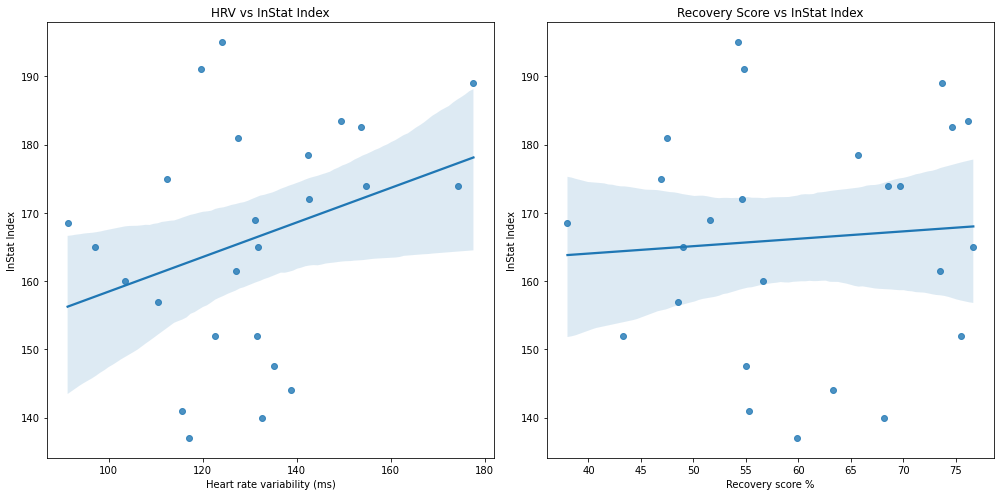

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, linregress

# Function to calculate correlation and linear regression
def analyze_relationship(df, x_col, y_col):
    # Correlation
    correlation, p_value_corr = pearsonr(df[x_col], df[y_col])

    # Linear regression
    slope, intercept, r_value, p_value_regr, std_err = linregress(df[x_col], df[y_col])

    return {
        'correlation': correlation,
        'p_value_corr': p_value_corr,
        'slope': slope,
        'intercept': intercept,
        'r_squared': r_value ** 2,
        'p_value_regr': p_value_regr
    }

# Remove any rows with missing data
weekly_trends_clean = weekly_trends.dropna(subset=['Heart rate variability (ms)', 'Recovery score %', 'InStat Index'])

# Analyze HRV vs. InStat Index
hrv_instat_results = analyze_relationship(weekly_trends_clean, 'Heart rate variability (ms)', 'InStat Index')

# Analyze Recovery Score vs. InStat Index
recovery_instat_results = analyze_relationship(weekly_trends_clean, 'Recovery score %', 'InStat Index')

# Print results
print("HRV vs InStat Index:", hrv_instat_results)
print("Recovery Score vs InStat Index:", recovery_instat_results)

# Visualization with Seaborn
plt.figure(figsize=(14, 7))

# Scatter plot for HRV vs InStat Index
plt.subplot(1, 2, 1)
sns.regplot(x='Heart rate variability (ms)', y='InStat Index', data=weekly_trends_clean)
plt.title('HRV vs InStat Index')

# Scatter plot for Recovery Score vs InStat Index
plt.subplot(1, 2, 2)
sns.regplot(x='Recovery score %', y='InStat Index', data=weekly_trends_clean)
plt.title('Recovery Score vs InStat Index')

plt.tight_layout()
plt.show()


### Interpretation of Results

#### HRV vs InStat Index:
- **Correlation**: A moderate positive correlation of 0.320 suggests that there is some relationship where higher HRV tends to be associated with a higher InStat Index, although the relationship is not strong.
- **P-value of Correlation**: With a p-value of approximately 0.118, the correlation between HRV and InStat Index is not statistically significant (p > 0.05).
- **Slope**: The positive slope of 0.253 indicates that for every unit increase in HRV, the InStat Index increases by about 0.253 points on average.
- **Intercept**: The intercept value of 133.115 suggests that when HRV is zero, the expected value of the InStat Index is about 133.115. (Not indicitive of much other than a lower bound of an instat index)
- **R-squared**: An R-squared value of 0.103 indicates that about 10% of the variability in the InStat Index is explained by HRV.
- **P-value of Regression**: The p-value for the regression is also approximately 0.118, which means the slope is not statistically significant.

#### Recovery Score vs InStat Index:
- **Correlation**: A very low correlation of 0.075 indicates a very weak positive relationship between Recovery Score and InStat Index. This suggests no meaningful linear relationship between these variables.
- **P-value of Correlation**: The p-value is 0.722, which is far above the significance level, indicating no statistical evidence of a significant correlation.
- **Slope**: The slope of 0.108 is near flat, which suggests almost no change in InStat Index with changes in the Recovery Score.
- **Intercept**: The intercept of 159.688 means that when the Recovery Score is zero, the expected InStat Index would be about 159.688. (Again, not indicitive of much other than a lower bound of an instat index)
- **R-squared**: An R-squared value of 0.006 indicates that less than 1% of the variability in InStat Index is explained by the Recovery Score, which is negligible.
- **P-value of Regression**: The high p-value of 0.722 indicates that the relationship between Recovery Score and InStat Index is not statistically significant.

### Summary

Both HRV and Recovery Score have been analyzed for their relationship with the InStat Index, which measures performance. The results show a moderate but not statistically significant relationship between HRV and InStat Index, suggesting that while there is some tendency for higher HRV to accompany better performance, the relationship is not strong or reliable. On the other hand, Recovery Score appears to have virtually no linear relationship with InStat Index, with no significant correlation observed.

These findings suggest that neither HRV nor Recovery Score, as measured and analyzed, are strong predictors of the InStat Index. For the player (myself), this might mean that other factors not included in this analysis could be more influential on the InStat Index, or that the relationships are not linear or may involve more complex interactions with other variables.

Instat Index is a small way to measure personal performance. We could create an potnetially create an ANOVA between HRV and other factors such as CORSI, expected goals when on ice and expected goals for opponent when on ice. However, the Instat Index is a human made formula which we know many of the weightings.

Our goal is to try to anticipate, produce, and reproduce high performance and factors that result in that. Some factors may be able to be measured but as seen, much of it lies on the player honing his own abilities and gamtime decisions.


## Author: Henry McKinney
